In [11]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
#Viewing Summary()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq,df)

In [16]:
data = pd.read_csv('Data/2.01. Admittance.csv')

In [17]:
#Creating dummy variables
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


#### Plotting Regression line

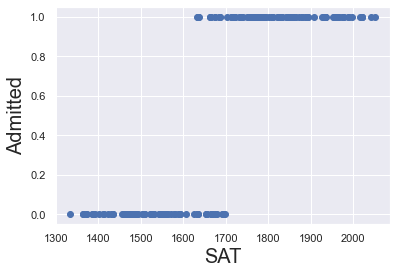

In [18]:
#Plotting SAT against Admitted
plt.scatter(data['SAT'],data['Admitted'])
plt.xlabel('SAT', size =20)
plt.ylabel('Admitted', size = 20)
plt.show()

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SAT vs Admitted')

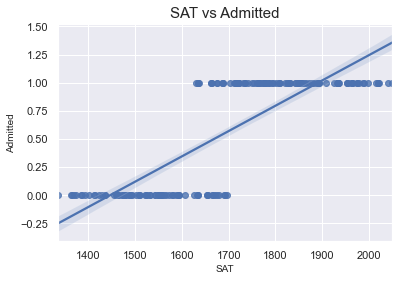

In [19]:
sns.regplot(data['SAT'], data['Admitted'], data = data)
plt.xlabel('SAT', fontsize = 10)
plt.ylabel('Admitted', fontsize = 10)
plt.title('SAT vs Admitted', fontsize = 15)

### Model Traning

In [20]:
x1 = data['SAT']
y = data['Admitted']
x = sm.add_constant(x1)
reg_lin = sm.Logit(y,x)
results_lin = reg_lin.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [21]:

results_lin

In [22]:
results_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Jan 2023   Pseudo R-squ.:                  0.7992
Time:                        20:37:12   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Plotting a logistic line

c:\Users\Abdul-Majeed-PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


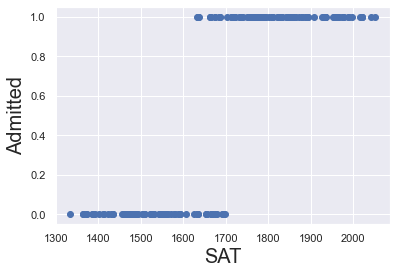

In [23]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/1+np.exp(b0+x+b1))

f_sorted = np.sort(f(x1,results_lin.params[0],results_lin.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()